In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm


In [3]:
# Read the dataset into a pandas DataFrame
data = pd.read_csv('Game_of_Thrones.csv')

In [4]:
# Extract the IMDb rating column
imdb_ratings = data['IMDb Rating']

In [5]:
print(data.describe())
#imdb ratinge göre çıkarım ve analiz etmek için.

          Season  No. of Episode (Season)  No. of Episode (Overall)  \
count  73.000000                73.000000                 73.000000   
mean    4.205479                 5.191781                 37.000000   
std     2.191897                 2.821827                 21.217131   
min     1.000000                 1.000000                  1.000000   
25%     2.000000                 3.000000                 19.000000   
50%     4.000000                 5.000000                 37.000000   
75%     6.000000                 7.000000                 55.000000   
max     8.000000                10.000000                 73.000000   

       Running Time (Minutes)  U.S. Viewers (Millions)  IMDb Rating  \
count               73.000000                73.000000    73.000000   
mean                56.945205                 6.447808     8.741096   
std                  7.185809                 2.827372     0.932565   
min                 49.000000                 2.200000     4.000000   
25%  

In [6]:
# Calculate the mean IMDb rating
mean_imdb_rating = imdb_ratings.mean()

# Print the result
print("Mean IMDb rating:", mean_imdb_rating)

Mean IMDb rating: 8.741095890410959


In [7]:
# Calculate the median IMDb rating
median_imdb_rating = imdb_ratings.median()

# Print the result
print("Median IMDb rating:", median_imdb_rating)

Median IMDb rating: 8.8


In [8]:
# Calculate the variance
variance_imdb_rating = np.var(imdb_ratings)

# Calculate the standard deviation
std_deviation_imdb_rating = np.std(imdb_ratings)

# Calculate the standard error
std_error_imdb_rating = std_deviation_imdb_rating / np.sqrt(len(imdb_ratings))

# Print the results
print("Variance of IMDb ratings:", variance_imdb_rating)
print("Standard deviation of IMDb ratings:", std_deviation_imdb_rating)
print("Standard error of IMDb ratings:", std_error_imdb_rating)

Variance of IMDb ratings: 0.8577631825858509
Standard deviation of IMDb ratings: 0.9261550532096939
Standard error of IMDb ratings: 0.10839824990915593


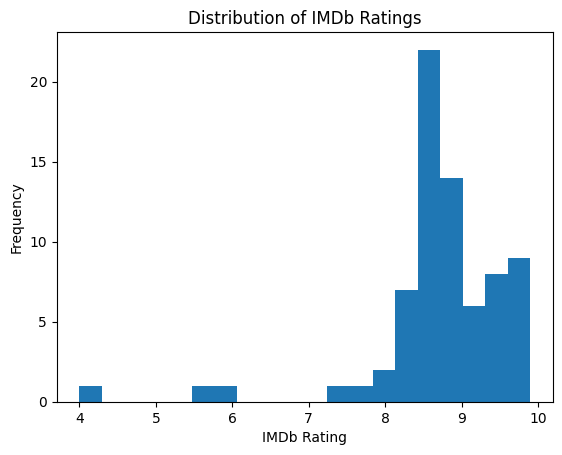

In [9]:
# Plot a histogram of the IMDb ratings
plt.hist(imdb_ratings, bins=20)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()

In [10]:
# Calculate the interquartile range (IQR)
Q1 = imdb_ratings.quantile(0.25)
Q3 = imdb_ratings.quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = imdb_ratings[(imdb_ratings < lower_bound) | (imdb_ratings > upper_bound)]

# Print the outliers
print("Outliers in IMDb ratings:")
print(outliers)

Outliers in IMDb ratings:
70    5.5
71    6.0
72    4.0
Name: IMDb Rating, dtype: float64


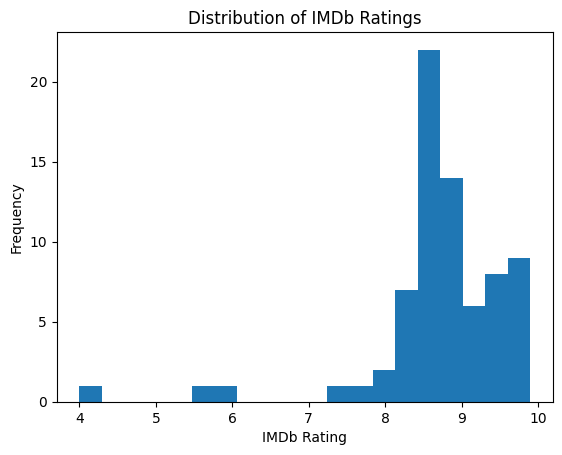

Summary Statistics:
Mean IMDb Rating: 8.741095890410959
Median IMDb Rating: 8.8
Minimum IMDb Rating: 4.0
Maximum IMDb Rating: 9.9
The distribution is negatively skewed.
There is variation in IMDb ratings.


In [11]:

# Plot a histogram of the IMDb ratings
plt.hist(imdb_ratings, bins=20)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()

# Calculate some summary statistics
mean_rating = imdb_ratings.mean()
median_rating = imdb_ratings.median()
min_rating = imdb_ratings.min()
max_rating = imdb_ratings.max()

# Print the summary statistics and comments
print("Summary Statistics:")
print("Mean IMDb Rating:", mean_rating)
print("Median IMDb Rating:", median_rating)
print("Minimum IMDb Rating:", min_rating)
print("Maximum IMDb Rating:", max_rating)

# Add comments about the data based on the summary statistics
if mean_rating > median_rating:
    print("The distribution is positively skewed.")
elif mean_rating < median_rating:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is symmetric.")

if min_rating == max_rating:
    print("All IMDb ratings are the same.")
else:
    print("There is variation in IMDb ratings.")

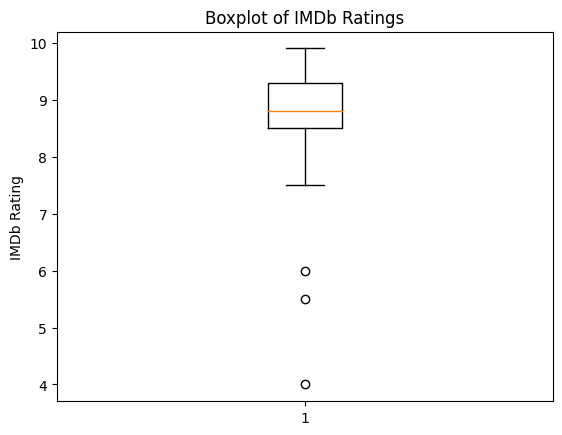

Summary Statistics:
Mean IMDb Rating: 8.741095890410959
Median IMDb Rating: 8.8
The distribution is negatively skewed.


In [12]:
# Create a boxplot of the IMDb ratings
plt.boxplot(imdb_ratings)
plt.ylabel('IMDb Rating')
plt.title('Boxplot of IMDb Ratings')
plt.show()

# Calculate some summary statistics
mean_rating = imdb_ratings.mean()
median_rating = imdb_ratings.median()

# Print the summary statistics and comments
print("Summary Statistics:")
print("Mean IMDb Rating:", mean_rating)
print("Median IMDb Rating:", median_rating)

# Add comments about the data based on the boxplot
if mean_rating > median_rating:
    print("The distribution is positively skewed.")
elif mean_rating < median_rating:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is symmetric.")

In [13]:
# Specify the sample size
sample_size = 73

# Randomly select the specified number of samples
samples = np.random.choice(imdb_ratings, size=sample_size, replace=False)

# Calculate the sample mean and sample standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples, ddof=1)

# Calculate the critical value for the t-distribution (two-tailed test)
alpha = 0.05
df = sample_size - 1
t_critical = t.ppf(1 - alpha/2, df)

# Calculate the confidence interval for the mean
mean_interval = (sample_mean - t_critical * sample_std / np.sqrt(sample_size),
                 sample_mean + t_critical * sample_std / np.sqrt(sample_size))

# Calculate the confidence interval for the variance
variance_interval = ((sample_size - 1) * sample_std**2 / t.ppf(1 - alpha/2, df),
                     (sample_size - 1) * sample_std**2 / t.ppf(alpha/2, df))

# Print the confidence intervals
print("95% Confidence Interval for the Mean:")
print(mean_interval)
print("\n95% Confidence Interval for the Variance:")
print(variance_interval)

95% Confidence Interval for the Mean:
(8.523512492304258, 8.95867928851766)

95% Confidence Interval for the Variance:
(31.411014170507574, -31.411014170507567)


In [14]:
# Specify the desired margin of error and confidence level
margin_of_error = 0.1
confidence_level = 0.90

# Estimate the population standard deviation using the sample standard deviation
sample_std = np.std(imdb_ratings, ddof=1)  # Sample standard deviation

# Calculate the required sample size
z_critical = norm.ppf(1 - (1 - confidence_level) / 2)  # Critical value for the normal distribution
sample_size = (z_critical * sample_std / margin_of_error) ** 2

# Round up the sample size to the nearest whole number
sample_size = np.ceil(sample_size)

# Print the required sample size
print("Required Sample Size:", sample_size)

Required Sample Size: 236.0
